<a href="https://colab.research.google.com/github/ParisaAligol/CityLearn-EVModel-Parisa/blob/develop-ev/analysistest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies
---

In [ ]:
# for installing packages using legacy code
!pip install setuptools

# The environment we will be working with
!pip install git+https://github.com/ParisaAligol/CityLearn-EVModel-Parisa@develop-ev

# For participant interactions (buttons)
!pip install ipywidgets

# To generate static figures
!pip install matplotlib
!pip install seaborn

# Provide standard RL algorithms
!pip install stable_baselines3
! pip install shimmy


  Cloning https://github.com/ParisaAligol/CityLearn-EVModel-Parisa (to revision develop-ev) to /tmp/pip-req-build-9ilaz_35
  Running command git clone --filter=blob:none --quiet https://github.com/ParisaAligol/CityLearn-EVModel-Parisa /tmp/pip-req-build-9ilaz_35
  Running command git checkout -b develop-ev --track origin/develop-ev
  Switched to a new branch 'develop-ev'
  Branch 'develop-ev' set up to track remote branch 'develop-ev' from 'origin'.
  Resolved https://github.com/ParisaAligol/CityLearn-EVModel-Parisa to commit d1002c051859ce0267c9c29708e9d16dd3ae9e9b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.5 MB/s eta 0:00:00
  Created wheel for CityLearn: filename=CityLearn-2.0b3-py3-none-any.whl size=18139893 sha256=0e388dc1544de08367086427ba3ad38a990048ee7e8ff2eca

# Import Dependencies
---

In [ ]:
import os
import numpy as np
import pandas as pd
import shutil
from stable_baselines3 import SAC
from citylearn.agents.rbc import BasicRBC
from citylearn.callback import SaveDataCallback
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.energy_model import ElectricVehicle, ZERO_DIVISION_CAPACITY
from citylearn.reward_function import RewardFunction
from citylearn.utilities import read_json, write_json
from citylearn.wrappers import NormalizedObservationWrapper, StableBaselines3Wrapper

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
from google.colab import files

# Use the files.upload() function to upload a file
uploaded = files.upload()

Saving Building_1.csv to Building_1.csv
Saving Building_1_EV_1.csv to Building_1_EV_1.csv
Saving Building_1_EV_2.csv to Building_1_EV_2.csv
Saving Building_1_EV_3.csv to Building_1_EV_3.csv
Saving Building_1_EV_4.csv to Building_1_EV_4.csv
Saving Building_1_EV_5.csv to Building_1_EV_5.csv
Saving Building_2.csv to Building_2.csv
Saving Building_2_EV_1.csv to Building_2_EV_1.csv
Saving Building_2_EV_2.csv to Building_2_EV_2.csv
Saving Building_2_EV_3.csv to Building_2_EV_3.csv
Saving Building_3.csv to Building_3.csv
Saving Building_4.csv to Building_4.csv
Saving Building_4_EV_1.csv to Building_4_EV_1.csv
Saving Building_4_EV_2.csv to Building_4_EV_2.csv
Saving Building_4_EV_3.csv to Building_4_EV_3.csv
Saving Building_4_EV_4.csv to Building_4_EV_4.csv
Saving Building_4_EV_5.csv to Building_4_EV_5.csv
Saving Building_5.csv to Building_5.csv
Saving Building_6.csv to Building_6.csv
Saving Building_6_EV_1.csv to Building_6_EV_1.csv
Saving Building_6_EV_2.csv to Building_6_EV_2.csv
Saving Bui

In [ ]:
# Specify the destination directory path in the Colab environment
destination_directory = '/usr/local/lib/python3.10/dist-packages/citylearn/data/citylearn_challenge_2023_phase_2/'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Move the uploaded file to the destination directory
for filename, content in uploaded.items():
    file_path = os.path.join(destination_directory, filename)
    with open(file_path, 'wb') as f:
        f.write(content)

print("File moved to the specific directory successfully.")

File moved to the specific directory successfully.


In [ ]:
SCHEMA_TEMPLATE = 'citylearn_challenge_2023_phase_2'
TARGET_DATASET_DIRECTORY = 'ev_test_data'
SCHEMA_FILEPATH = os.path.join(TARGET_DATASET_DIRECTORY, SCHEMA_TEMPLATE, 'schema.json')

# Create Test Dataset
---

In [ ]:
# Copy an existing dataset
if os.path.isdir(TARGET_DATASET_DIRECTORY):
    shutil.rmtree(TARGET_DATASET_DIRECTORY)
else:
    pass

DataSet.copy(SCHEMA_TEMPLATE, TARGET_DATASET_DIRECTORY)
schema = read_json(SCHEMA_FILEPATH)



# Test Simulation
---

## RBC

In [ ]:
env = CityLearnEnv(SCHEMA_FILEPATH)
model = BasicRBC(env)
model.learn(episodes=1)
display(env.evaluate())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,cost_function,value,name,level
0,annual_peak_average,0.989005,District,district
1,carbon_emissions_total,1.008504,District,district
2,cost_total,1.019578,District,district
3,daily_peak_average,1.171252,District,district
4,discomfort_delta_average,0.000000,District,district
...,...,...,...,...
79,discomfort_too_cold_proportion,NaN,Building_7,building
80,discomfort_too_hot_proportion,NaN,Building_7,building
81,discomfort_delta_minimum,0.000000,Building_7,building
82,discomfort_delta_maximum,0.000000,Building_7,building


In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_building_guide(env):
    """Plots building load and generation profiles."""

    column_count_limit = 4
    building_count = len(env.buildings)
    row_count = math.ceil((building_count + 1) / column_count_limit)  # Add 1 for the sum chart
    column_count = min(column_count_limit, building_count)
    figsize = (4.0 * column_count, 1.75 * row_count)
    fig, axes = plt.subplots(row_count, column_count, figsize=figsize)

    # Calculate the sum of the total for each time step across all buildings
    total_sum = [0] * len(env.buildings[0].energy_simulation.non_shiftable_load)
    for b in env.buildings:
        total_sum = [total_sum[i] + b.energy_simulation.non_shiftable_load[i] for i in range(len(total_sum))]

    for i, (ax, b) in enumerate(zip(axes.flat, env.buildings)):
        y1 = b.energy_simulation.non_shiftable_load
        y2 = b.pv.get_generation(b.energy_simulation.solar_generation)
        x = range(len(y1))
        ax.plot(x, y1, label='Load')
        ax.plot(x, y2, label='Generation')
        ax.set_title(b.name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('kWh')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
        else:
            ax.legend().set_visible(False)

    # Create a new subplot for the sum chart
    ax_sum = axes.flat[-1]
    ax_sum.plot(x, total_sum, label='Total Sum', color='red')
    ax_sum.set_title('Total Sum')
    ax_sum.set_xlabel('Time step')
    ax_sum.set_ylabel('kWh')
    ax_sum.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax_sum.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)

    # Hide any remaining empty subplots
    for ax in axes.flat[building_count:]:
        ax.set_visible(False)

    plt.tight_layout()
    return fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


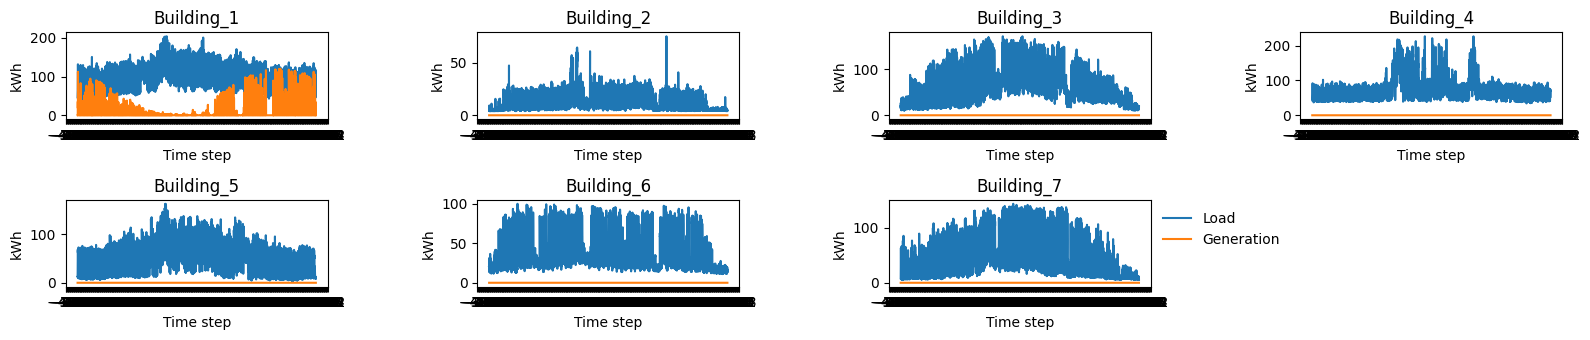

In [ ]:
plot_building_guide(env)
plt.savefig('case_study.png', format='png', dpi=600)
plt.show()

## SB3 SAC

In [ ]:
class CustomReward(RewardFunction):
    def __init__(self, env: CityLearnEnv):
        super().__init__(env)

    def calculate(self):
        reward_list = []

        for b in self.env.buildings:
            e = b.net_electricity_consumption[-1]
            reward = 0.0

            for s in [b.electrical_storage] + b.electric_vehicles:
                if not isinstance(s, ElectricVehicle) or (isinstance(s, ElectricVehicle) and s.schedule.availability[-1] == 1):
                    c = s.capacity_history[0]
                    s = s.soc[-1]/c
                    reward += -(1.0 + np.sign(e)*s)*abs(e) if c > ZERO_DIVISION_CAPACITY else 0.0
                else:
                    pass

            reward_list.append(reward)

        if self.env.central_agent:
            reward = [sum(reward_list)]
        else:
            reward = reward_list

        return reward

In [ ]:
# train
episodes = 1
env = CityLearnEnv(SCHEMA_FILEPATH, central_agent=True)
env.reward_function = CustomReward(env) # set custom reward
env = NormalizedObservationWrapper(env)
env = StableBaselines3Wrapper(env)
model = SAC('MlpPolicy', env, learning_rate=0.005, learning_starts=env.unwrapped.time_steps, tau=0.05, gamma=0.9)
callback = SaveDataCallback(env, 'citylearn_ev', 'results')
model.learn(total_timesteps=episodes*env.unwrapped.time_steps, callback=callback)

# evaluate
observations = env.reset()
done = False

while not env.done:
    print(f'\rTime step: {env.time_step + 1}/{env.time_steps}', end=' '*50)
    actions, _ = model.predict(observations, deterministic=True)
    observations, reward, done, _ = env.step(actions)

display(env.evaluate())

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, ax

Time step: 8759/8760                                                  

,cost_function,value,name,level
0,annual_peak_average,1.011908,District,district
1,carbon_emissions_total,1.008847,District,district
2,cost_total,1.008362,District,district
3,daily_peak_average,1.023101,District,district
4,discomfort_delta_average,0.000000,District,district
...,...,...,...,...
79,discomfort_too_cold_proportion,NaN,Building_7,building
80,discomfort_too_hot_proportion,NaN,Building_7,building
81,discomfort_delta_minimum,0.000000,Building_7,building
82,discomfort_delta_maximum,0.000000,Building_7,building


In [ ]:
district_cost_data = DATABASE.query_table(q.get_district_cost_summary())

NameError: ignored

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

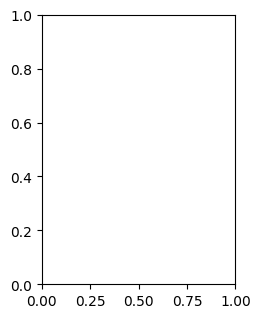

In [ ]:
row_count = 1
column_count = 1
fig, ax = plt.subplots(row_count, column_count, figsize=(column_count*2.5, row_count*3.5))
plot_data = district_cost_data[district_cost_data['episode']==district_cost_data['episode'].max()].copy()
plot_data['agent'] = 'SAC'
rbc_plot_data = RBC_REFERENCE_COST_SUMMARY.query('scope == "district"').copy()
rbc_plot_data['agent'] = 'RBC'
plot_data = pd.concat([plot_data, rbc_plot_data], ignore_index=True, sort=False)
plot_data['cost_label'] = plot_data['cost'].map(lambda x: cost_labels[x])
hue_order = ['SAC', 'RBC']
sns.barplot(x='value', y='cost_label', data=plot_data, hue='agent', order=cost_labels.values(), hue_order=hue_order, ax=ax)
ax.axvline(1.0, color='black', linestyle='--', label='Baseline (no battery)')
ax.set_xlabel('Score')
ax.set_ylabel(None)

for s in ['right','top']:
    ax.spines[s].set_visible(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.0, f'{p.get_width():0.2f}', ha='left', va='center')

ax.legend(
    bbox_to_anchor=(1.0,1.0),
    loc='upper left',
    framealpha=0,
    ncol=1
)

plt.savefig(os.path.join(FIGURES_DIRECTORY,f'deployment_strategy_1_0_district_cost_summary.pdf'),bbox_inches='tight',transparent=True)
plt.show()